<a href="https://colab.research.google.com/github/Santanaa07/Aplicativo_Tratamento_img_OpenCV_Sobel/blob/main/Aplicativo_trata_img_sobel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2



O que deseja fazer?
1- Negativo
2- Adição e subtração de imagens
3- Conversão de imagem colorida em imagem em níveis de cinza
4- Separação de canais da imagem colorida
5- Binarização
6- Spliting
7- Filtros: média, mediana e Gausiana
8- Filtro: SOBEL
0- SAIR

Opção: 8
Digite o nome da Imagem com a extensão (<imagem>.png <imagem>.jpg): 
Stitch.jpg
Sobel X:


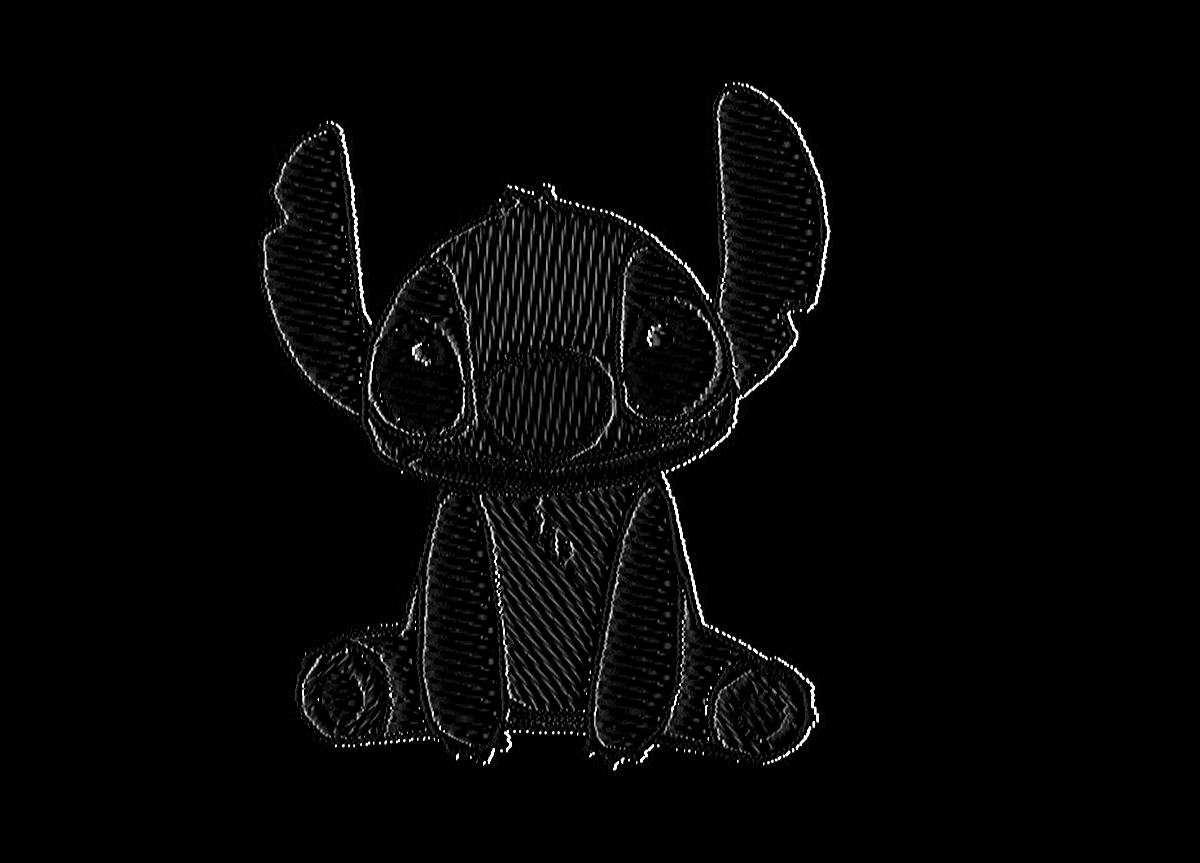

Sobel Y:


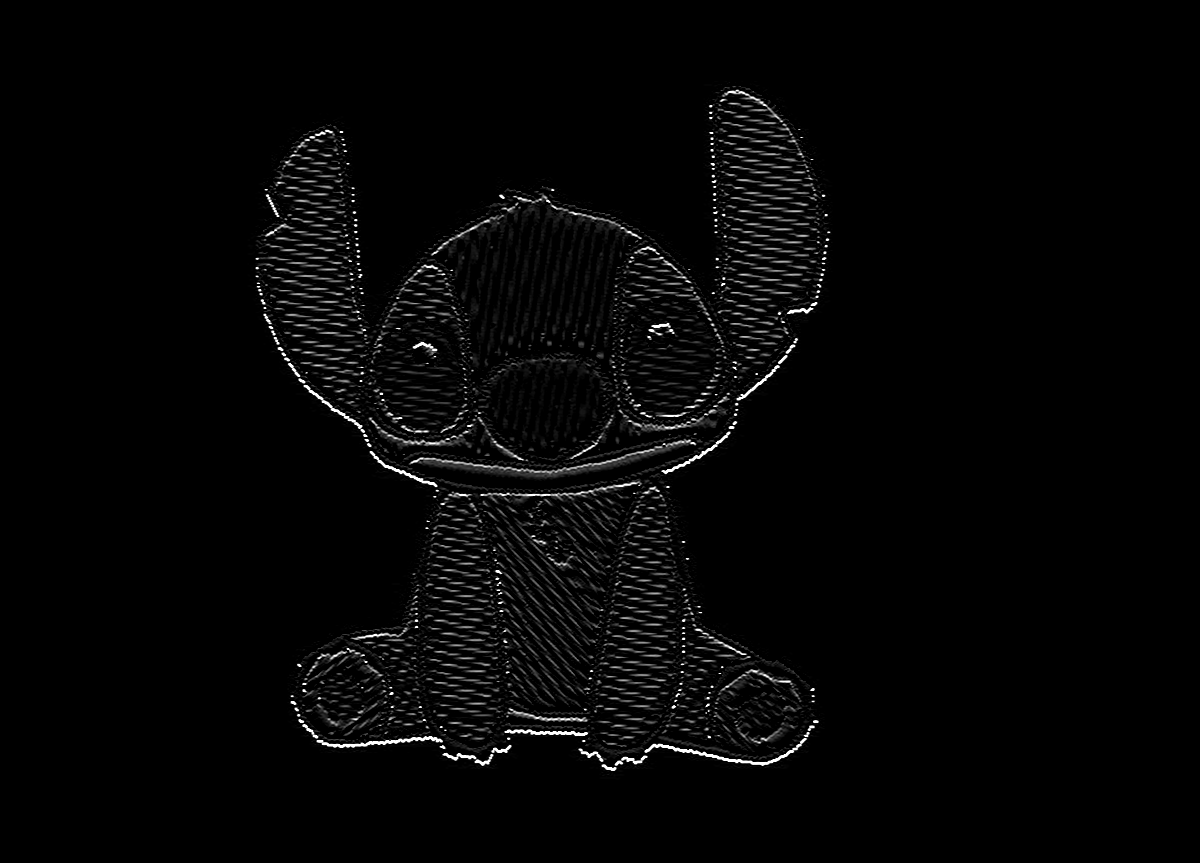


O que deseja fazer?
1- Negativo
2- Adição e subtração de imagens
3- Conversão de imagem colorida em imagem em níveis de cinza
4- Separação de canais da imagem colorida
5- Binarização
6- Spliting
7- Filtros: média, mediana e Gausiana
8- Filtro: SOBEL
0- SAIR

Opção: 0

Até mais!


SystemExit: ignored

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [7]:
import cv2
import numpy as np
import sys
from google.colab.patches import cv2_imshow

# Função de Menu
def menu():
  while True:
    print("\nO que deseja fazer?")
    print("1- Negativo")
    print("2- Adição e subtração de imagens")
    print("3- Conversão de imagem colorida em imagem em níveis de cinza")
    print("4- Separação de canais da imagem colorida")
    print("5- Binarização")
    print("6- Spliting")
    print("7- Filtros: média, mediana e Gausiana")
    print("8- Filtro: SOBEL")
    print("0- SAIR")

    i = input("\nOpção: ") # recebe a opção desejada e dentro dos IFs, chama cada função
    
    if i == '0':
      print('\nAté mais!')
      sys.exit() # encerra a aplicação

    elif i == '1':
      nomeImg = input('Digite o nome da Imagem com a extensão (<imagem>.png <imagem>.jpg): \n')
      negativo(nomeImg)

    elif i == '2':
      print("\nO que deseja fazer?")
      print("1- Adição")
      print("2- Subtração")
      i = input("\nOpção: ")

      nomeImg01 = input('\nDigite o nome da 1ª Imagem com a extensão (<imagem>.png <imagem>.jpg): ')
      nomeImg02 = input('\nDigite o nome da 2ª Imagem com a extensão (<imagem>.png <imagem>.jpg): ')
      adicao_subtracao(i, nomeImg01, nomeImg02)

    elif i == '3':
      nomeImg = input('Digite o nome da Imagem com a extensão (<imagem>.png <imagem>.jpg): \n')
      cinza(nomeImg)

    elif i == '4':
      nomeImg = input('Digite o nome da Imagem com a extensão (<imagem>.png <imagem>.jpg): \n')
      cores(nomeImg)

    elif i == '5':
      nomeImg = input('Digite o nome da Imagem com a extensão (<imagem>.png <imagem>.jpg): \n')
      binar(nomeImg)

    elif i == '6':
      print('\nNão implementado, não entendi o que precisava fazer :CC\n')
      menu()

    elif i == '7':
      print("\nO que deseja fazer?")
      print("1- Média")
      print("2- Mediana")
      print("3- Gaussiana")
      i = input("\nOpção: ")

      nomeImg = input('Digite o nome da Imagem com a extensão (<imagem>.png <imagem>.jpg): \n')
      escala = input('Digite em qual escala deseja calcular (3= 3x3, 5= 5x5, 7= 7x7...): \n')
      median(i, nomeImg, int(escala))

    elif i == '8':
      nomeImg = input('Digite o nome da Imagem com a extensão (<imagem>.png <imagem>.jpg): \n')
      sobel(nomeImg)
    else:
      print('Opção inválida! Tente novamente.')


def negativo(imagem): # 1- Negativo
  img = cv2.imread(imagem)
  w, h, d = img.shape # largura, altura, profundidade
  negativo = np.zeros(img.shape, img.dtype)

  for y in range(w):
    for x in range(h):
      for z in range(d):
        negativo[y,x,z] = 255 - img[y,x,z]
  cv2_imshow(negativo)

  menu()


def adicao_subtracao(i, imagem01, imagem02): # 2- Adição e subtração de imagens
  img1 = cv2.imread(imagem01)
  img2 = cv2.imread(imagem02)

  # redimensione as imagens para o mesmo tamanho
  img1 = cv2.resize(img1, (img2.shape[1], img2.shape[0]))

  # verifição de qual opção o usuario escolheu
  if i == '1': # 1- Adição
    add_img = cv2.addWeighted(img1, 0.6, img2, 0.4, 0)
    cv2_imshow(img1)
    cv2_imshow(img2)
    cv2_imshow(add_img)

  elif i == '2': # 2- Subtração
    sub_img = cv2.absdiff(img1, img2)
    cv2_imshow(img1)
    cv2_imshow(img2)
    cv2_imshow(sub_img)

  menu()

def cinza(imagem):  # 3- Conversão de imagem colorida em imagem em níveis de cinza"
  img = cv2.imread(imagem, cv2.IMREAD_GRAYSCALE)
  cv2_imshow(img)

  menu()

def cores(imagem): # 4- Separação de canais da imagem colorida
  img = cv2.imread(imagem)
  (blue, grenn, red) = cv2.split(img)

  # Apresentação de cada canal
  print('Canal Vermelho')
  cv2_imshow(red)

  print('Canal Verde')
  cv2_imshow(grenn)

  print('Canal Azul')
  cv2_imshow(blue)

  menu()


def binar(imagem):  # 5- Binarização
  img = cv2.imread(imagem, cv2.IMREAD_GRAYSCALE)
  blur = cv2.GaussianBlur(img, (7, 7), 0) # suavização da img
  # Binarização da imagem com limiar 80
  limiar, img_bin = cv2.threshold(blur, 80, 255, cv2.THRESH_BINARY)
  cv2_imshow(img_bin)

  menu()


def median(i, imagem, escala): # 7- Filtros: média, mediana e Gausiana
  img = cv2.imread(imagem)

  if i == '1': #media
      img = cv2.blur(img, (escala , escala))

  elif i == '2': #mediana
      img = cv2.medianBlur(img, (escala))

  elif i == '3': #gaussiana
      img = cv2.GaussianBlur(img, (escala , escala), 0)

  cv2_imshow(img)

  menu()


def sobel(imagem):  # 8- Filtro: Sobel
  img = cv2.imread(imagem, cv2.IMREAD_GRAYSCALE)
  # Aplica o filtro SobelX 
  imgSobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0)
  imgSobelY = cv2.Sobel(img, cv2.CV_64F, 0, 1)

  print('Sobel X:')
  cv2_imshow(imgSobelX)
  print('Sobel Y:')
  cv2_imshow(imgSobelY)

  menu()

if __name__ == '__main__': # Chama o menu quando iniciar o código
  menu()
